In [ ]:
# %%

from tool import *

Showing OpenCV Image


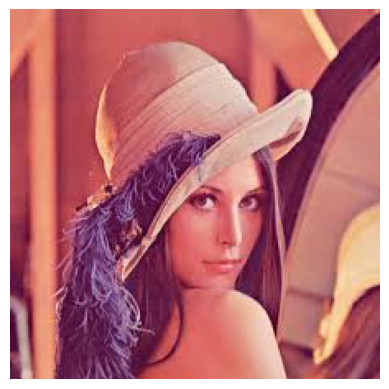

In [ ]:
# %% Add Gaussian noise to an image

lena = imread("L1_lena_color.jpg")

In [ ]:
# %% Use Manual Defined Function to add Gaussian Noise

"""
You should try 4 different standard
deviation in your program
(std=0,0.1,0.3,0.5 for double-type image)
"""


def add_gaussian_noise(img, mean=0, std=0.5):
    """Add Gaussian Noise to an image"""
    gaussian_noise = np.random.normal(mean, std, img.shape)
    img_gaussian_noise = img + gaussian_noise
    img_gaussian_noise = np.clip(img_gaussian_noise, 0, 255).astype(np.uint8)
    return img_gaussian_noise

Add Gaussian Noise with std=0.1
Showing OpenCV Image


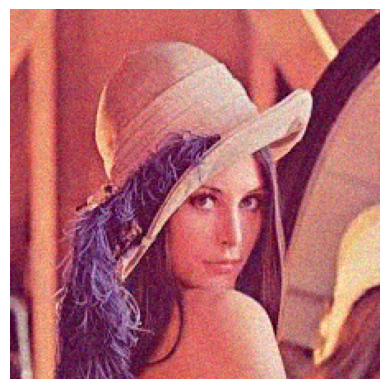

In [ ]:
# %%

print("Add Gaussian Noise with std=0.1")
imshow(add_gaussian_noise(lena, std=0.1 * 128))

Add Gaussian Noise with std=0.2
Showing OpenCV Image


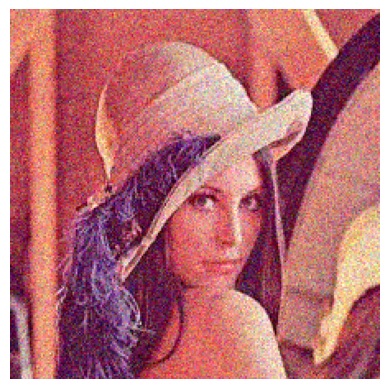

In [ ]:
# %%

print("Add Gaussian Noise with std=0.2")
imshow(add_gaussian_noise(lena, std=0.2 * 128))

Add Gaussian Noise with std=0.3
Showing OpenCV Image


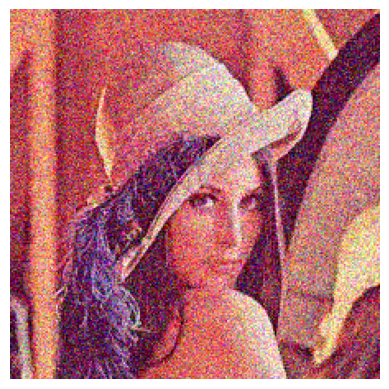

In [ ]:
# %%

print("Add Gaussian Noise with std=0.3")
imshow(add_gaussian_noise(lena, std=0.3 * 128))

Add Gaussian Noise with std=0.5
Showing OpenCV Image


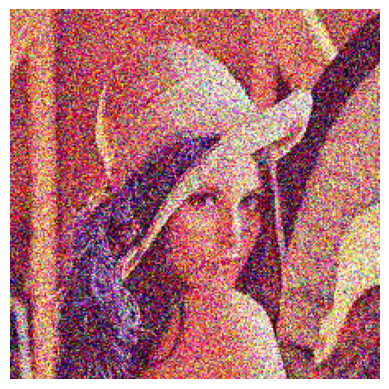

In [ ]:
# %%

print("Add Gaussian Noise with std=0.5")
imshow(add_gaussian_noise(lena, std=0.5 * 128))

In [ ]:
# %% Salt and Pepper Noise

"""
• Salt noise: noise points’ values are 255
• Pepper noise: Noise points’ values are 0
• Random : the noise density is a constant.
• In every channel of the original image
• Random change some pixels’ values (set 0 or 255)

You should try 4 different density in
your program
(density=0,0.05,0.1,0.3)
"""


def add_salt_pepper_noise(img_, density=0.05):
    """Add Salt and Pepper Noise to an image"""
    img = copy.deepcopy(img_)
    noise = np.random.rand(*img.shape)
    img[noise < density / 2] = 0
    img[noise > 1 - density / 2] = 255
    return img

Add Salt and Pepper Noise with density=0
Showing OpenCV Image


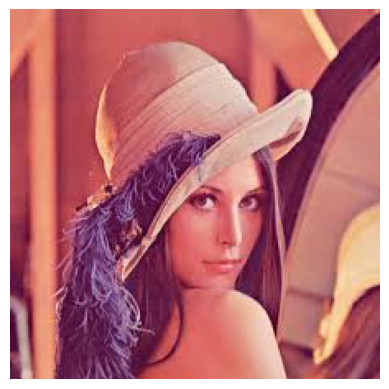

In [ ]:
# %%

print("Add Salt and Pepper Noise with density=0")
imshow(add_salt_pepper_noise(lena, density=0))

Add Salt and Pepper Noise with density=0.05
Showing OpenCV Image


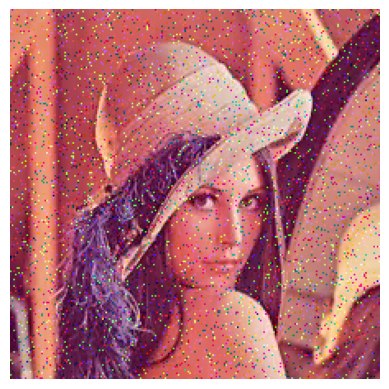

In [ ]:
# %%

print("Add Salt and Pepper Noise with density=0.05")
imshow(add_salt_pepper_noise(lena, density=0.05))

Add Salt and Pepper Noise with density=0.1
Showing OpenCV Image


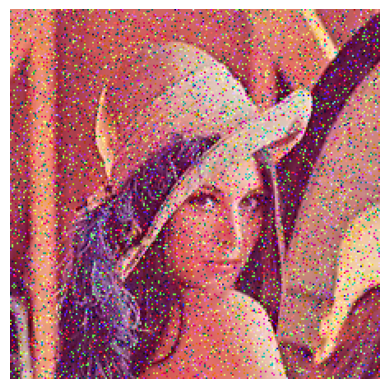

In [ ]:
# %%

print("Add Salt and Pepper Noise with density=0.1")
imshow(add_salt_pepper_noise(lena, density=0.1))

Add Salt and Pepper Noise with density=0.3
Showing OpenCV Image


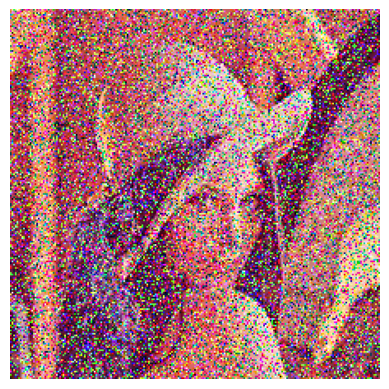

In [ ]:
# %%

print("Add Salt and Pepper Noise with density=0.3")
imshow(add_salt_pepper_noise(lena, density=0.3))

In [ ]:
# %% Image Denoise

"""
Generate two noisy images - Use the following method to denoise an image
• Averaging operator
• Gaussian averaging
• Bilateral Filter
• Median filter
"""

'\nGenerate two noisy images - Use the following method to denoise an image\n• Averaging operator\n• Gaussian averaging\n• Bilateral Filter\n• Median filter\n'

Showing OpenCV Image


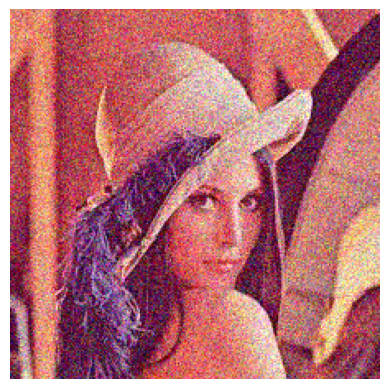

In [ ]:
# %%

lena_gaussian_noise = add_gaussian_noise(lena, std=1 * 32)
imshow(lena_gaussian_noise)
imwrite(lena_gaussian_noise, "L2_lena_gaussian_noise.jpg")

Showing OpenCV Image


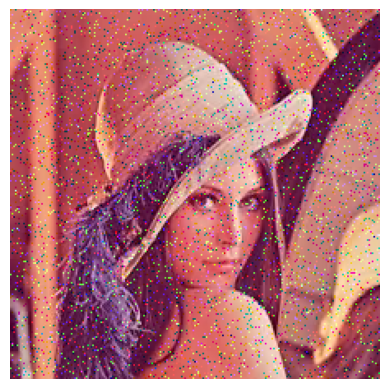

In [ ]:
# %%

lena_salt_pepper_noise = add_salt_pepper_noise(lena, density=0.05)
imshow(lena_salt_pepper_noise)
imwrite(lena_salt_pepper_noise, "L2_lena_salt_pepper_noise.jpg")

In [ ]:
# %% Define Filters

size = [3, 5, 7]

filters = {
    "Averaging": lambda img, size: cv2.blur(img, (size, size)),
    "Gaussian": lambda img, size: cv2.GaussianBlur(img, (size, size), 16),
    "Bilateral": lambda img, size: cv2.bilateralFilter(img, size, 90, 90),
    "Median": lambda img, size: cv2.medianBlur(img, size),
}

Use Averaging Filter to Denoise Gaussian Noise
Showing OpenCV Image


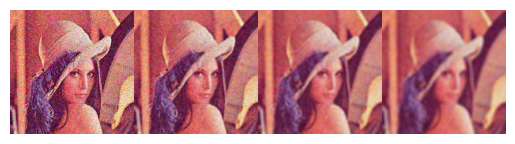

In [ ]:
# %%

print("Use Averaging Filter to Denoise Gaussian Noise")
# 将多张拼接成一张
imshow(
    np.hstack(
        [lena_gaussian_noise]
        + [filters["Averaging"](lena_gaussian_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Averaging"](lena_gaussian_noise, s),
        f"L2_lena_gaussian_noise_Averaging_{s}.jpg",
    )

Use Averaging Filter to Denoise Salt and Pepper Noise
Showing OpenCV Image


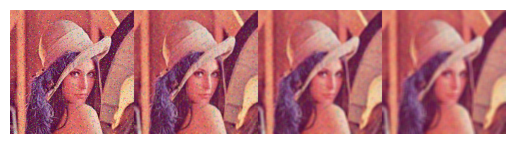

In [ ]:
# %%

print("Use Averaging Filter to Denoise Salt and Pepper Noise")
imshow(
    np.hstack(
        [lena_salt_pepper_noise]
        + [filters["Averaging"](lena_salt_pepper_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Averaging"](lena_salt_pepper_noise, s),
        f"L2_lena_salt_pepper_noise_Averaging_{s}.jpg",
    )

Use Gaussian Filter to Denoise Gaussian Noise
Showing OpenCV Image


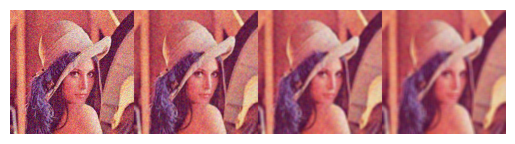

In [ ]:
# %%

print("Use Gaussian Filter to Denoise Gaussian Noise")
imshow(
    np.hstack(
        [lena_gaussian_noise]
        + [filters["Gaussian"](lena_gaussian_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Gaussian"](lena_gaussian_noise, s),
        f"L2_lena_gaussian_noise_Gaussian_{s}.jpg",
    )

Use Gaussian Filter to Denoise Salt and Pepper Noise
Showing OpenCV Image


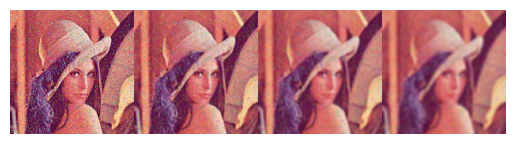

In [ ]:
# %%

print("Use Gaussian Filter to Denoise Salt and Pepper Noise")
imshow(
    np.hstack(
        [lena_salt_pepper_noise]
        + [filters["Gaussian"](lena_salt_pepper_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Gaussian"](lena_salt_pepper_noise, s),
        f"L2_lena_salt_pepper_noise_Gaussian_{s}.jpg",
    )

Use Bilateral Filter to Denoise Gaussian Noise
Showing OpenCV Image


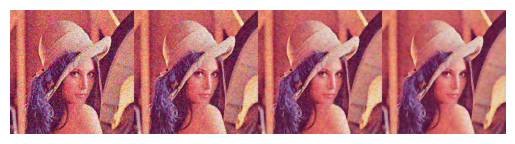

In [ ]:
# %%

print("Use Bilateral Filter to Denoise Gaussian Noise")
imshow(
    np.hstack(
        [lena_gaussian_noise]
        + [filters["Bilateral"](lena_gaussian_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Bilateral"](lena_gaussian_noise, s),
        f"L2_lena_gaussian_noise_Bilateral_{s}.jpg",
    )

Use Bilateral Filter to Denoise Salt and Pepper Noise
Showing OpenCV Image


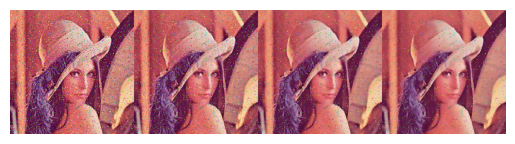

In [ ]:
# %%

print("Use Bilateral Filter to Denoise Salt and Pepper Noise")
imshow(
    np.hstack(
        [lena_salt_pepper_noise]
        + [filters["Bilateral"](lena_salt_pepper_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Bilateral"](lena_salt_pepper_noise, s),
        f"L2_lena_salt_pepper_noise_Bilateral_{s}.jpg",
    )

Use Median Filter to Denoise Gaussian Noise
Showing OpenCV Image


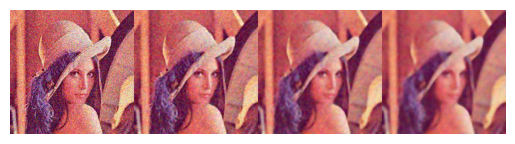

In [ ]:
# %%

print("Use Median Filter to Denoise Gaussian Noise")
imshow(
    np.hstack(
        [lena_gaussian_noise]
        + [filters["Median"](lena_gaussian_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Median"](lena_gaussian_noise, s),
        f"L2_lena_gaussian_noise_Median_{s}.jpg",
    )

Use Median Filter to Denoise Salt and Pepper Noise
Showing OpenCV Image


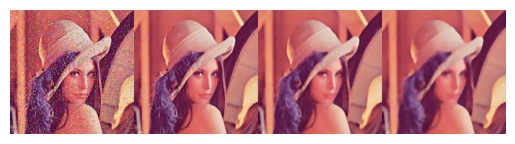

In [ ]:
# %%

print("Use Median Filter to Denoise Salt and Pepper Noise")
imshow(
    np.hstack(
        [lena_salt_pepper_noise]
        + [filters["Median"](lena_salt_pepper_noise, s) for s in size]
    )
)
for s in size:
    imwrite(
        filters["Median"](lena_salt_pepper_noise, s),
        f"L2_lena_salt_pepper_noise_Median_{s}.jpg",
    )